In [1]:
import pandas as pd
MinMaxPd=(pd.read_csv('~/DATA/PA_2018/normAllFeatures_75.csv')).drop(columns=['Unnamed: 0'])
MinMaxPd1=(pd.read_csv('~/DATA/PA_2018/normAllFeatures_25.csv')).drop(columns=['Unnamed: 0'])
patFlags=(pd.read_csv('~/DATA/PA_2018/patFlags.csv')).drop(columns=['Unnamed: 0'])
print(len(MinMaxPd),len(MinMaxPd.columns))
print(len(MinMaxPd1),len(MinMaxPd1.columns))
print(len(patFlags),len(patFlags.columns))

1874 86
1874 268
1874 11


## Logistic Regression

### Odds Ratio and Risk Ratio 

It is a regression model where the dependent variable (y) is categorical. It depends on the the logistic function 

$F(t) = {e^t\over e^t+1} \ where \ {t \in R}$

The logistic function, also called the sigmoid function was developed to describe properties of population growth in ecology, rising quickly and maxing out at the carrying capacity of the environment.

<img src="SigmFunc.png" height= 35% width=35% style="  right;">


We need to estimate the latent/dependent variable:

$y =
    \left\{
            \begin{array}{ll}
               1  & {\beta_0 + \beta_1x+\epsilon > 0} \\
               0  & else
            \end{array}
    \right.$
    
Where  $t={\beta_0 + \beta_1x+\epsilon > 0}$

The goal is to calculate $\beta_0 + \beta_1x$ which could be derived from $ {F(t) \over 1-F(t)} = {e^{\beta_0 + \beta_1x}} $

As such **odds** = $e^{\beta_0 + \beta_1x}$ and defined as ** the likelihood that the event will take place **

Then ** odds ratio (OR) : **
- ** ${odds(x+1)\over odds(x)} = {e^{\beta_1}}$  if x is continious
- if x is categorical, we may want to use the contingency table, for wx:

 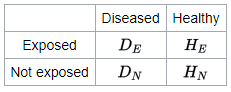
 
 $ OR= {disease \ ratio \over healthy \ ratio} \  or  \ {{D_E/D_N} \over {H_E/H_N}} $
 
 But Risk Ratio (RR) is 

$ RR= {disease \ ratio \over \ exposed \ ratio} \  or  \ {{D_E/D_N} \over {N_E/N_N}} \ { where \ N_E \ and \ N_N \ are \ two \ totals \ of \ exposed \ and \ not \ exposed \ respictively} $

In [2]:
import sklearn.linear_model
help (sklearn.linear_model.LogisticRegressionCV)

Help on class LogisticRegressionCV in module sklearn.linear_model.logistic:

class LogisticRegressionCV(LogisticRegression, sklearn.base.BaseEstimator, sklearn.linear_model.base.LinearClassifierMixin)
 |  Logistic Regression CV (aka logit, MaxEnt) classifier.
 |  
 |  This class implements logistic regression using liblinear, newton-cg, sag
 |  of lbfgs optimizer. The newton-cg, sag and lbfgs solvers support only L2
 |  regularization with primal formulation. The liblinear solver supports both
 |  L1 and L2 regularization, with a dual formulation only for the L2 penalty.
 |  
 |  For the grid of Cs values (that are set by default to be ten values in
 |  a logarithmic scale between 1e-4 and 1e4), the best hyperparameter is
 |  selected by the cross-validator StratifiedKFold, but it can be changed
 |  using the cv parameter. In the case of newton-cg and lbfgs solvers,
 |  we warm start along the path i.e guess the initial coefficients of the
 |  present fit to be the coefficients got aft

# Normalization  

Normalization, which scales all numeric variables in the range usually between 0 and 1.

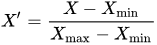

## Advantages and Disadvantages:
1. Outliers?
2. Classification?
2. Clustering?


See: http://scikit-learn.org/stable/modules/preprocessing.html 


# Standardization 

 
Feature standardization makes the values of each feature in the data have zero-mean (when subtracting the mean in the numerator) and unit-variance.

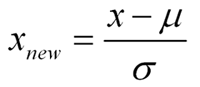
 

## Advantages and Disadvantages:
1. Outliers?
2. Classification?
2. Clustering?


See: http://scikit-learn.org/stable/modules/preprocessing.html 

In [2]:
"""
1- Encode the outcome to 1 and 0
2- Drop Comorbidities
3  Normalize the data
4- Use one test (No Validation)

"""
import numpy as np
import warnings
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split as tts 
from sklearn.linear_model import LogisticRegressionCV
from sklearn.metrics import accuracy_score

warnings.filterwarnings("ignore")
label_encoder = LabelEncoder()
patOutcome=label_encoder.fit_transform(patFlags['icustay_expire_flg'])
LRCV=LogisticRegressionCV(cv=20,solver='liblinear')



myData=MinMaxPd.drop(['congestive_heart_failure', 'valvular_disease', 'pulmonary_circulation',
       'diabetes_complicated', 'lymphoma', 'weight_loss', 'fluid_electrolyte',
       'blood_loss_anemia', 'deficiency_anemias', 'alcohol_abuse',
       'drug_abuse', 'psychoses', 'depression'], axis=1)



X_train, X_val, y_train, y_val = tts(myData,patOutcome, test_size=0.2, random_state=42)
LRCV.fit(X_train,y_train)
pred =LRCV.predict(X_val)
Results =[LRCV.intercept_,LRCV.coef_,pred, np.exp(LRCV.coef_),accuracy_score(y_val, pred)]
Results

[array([-0.02024679]),
 array([[-0.01308816, -0.01422397, -0.08217273, -0.0069832 , -0.00129902,
         -0.00087929, -0.00076376, -0.00174209, -0.00216052, -0.00114873,
         -0.00062634, -0.00144507, -0.00210843, -0.00110064, -0.00211562,
         -0.00237548, -0.00103657, -0.00076291, -0.00170416, -0.00149661,
         -0.00212699, -0.00127615, -0.0022033 , -0.00137413, -0.00172524,
         -0.00214054, -0.00111135, -0.00117674, -0.0014839 , -0.00170035,
         -0.00169663, -0.00150271, -0.00101156, -0.0018257 , -0.0012223 ,
         -0.00087259, -0.00203022, -0.00164917, -0.00160986, -0.00092636,
         -0.00098475, -0.00213066, -0.00110235, -0.00028819, -0.00136206,
         -0.00216097, -0.00158423, -0.00125217, -0.00224707, -0.00200085,
         -0.00162314, -0.00119515, -0.0019518 , -0.00197052, -0.00158463,
         -0.00087702, -0.00045116, -0.00185728, -0.00105823, -0.00202257,
         -0.00084352, -0.00233629, -0.00240903, -0.00298019, -0.00194751,
         -0.001

In [3]:
"""
What if we try different types of set of predictors?
What is the confusion matrix of each experiment?
"""
import numpy as np
import warnings
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split as tts 
from sklearn.linear_model import LogisticRegressionCV
from sklearn.metrics import accuracy_score,confusion_matrix

warnings.filterwarnings("ignore")
patOutcome=label_encoder.fit_transform(patFlags['icustay_expire_flg'])
Results=[]
confusionMatrix=[]



LRCV=LogisticRegressionCV(cv=10)
myData=MinMaxPd 
X_train, X_val, y_train, y_val = tts(myData,patOutcome, test_size=0.1, random_state=42)
LRCV.fit(X_train,y_train)
pred =LRCV.predict(X_val)
tn, fp, fn, tp=confusion_matrix(y_val,pred).ravel()
confusionMatrix.append([tn, fp, fn, tp])
Results.append(accuracy_score(y_val, pred))


LRCV=LogisticRegressionCV(cv=10)
myData=MinMaxPd.drop(['congestive_heart_failure', 'valvular_disease', 'pulmonary_circulation',
       'diabetes_complicated', 'lymphoma', 'weight_loss', 'fluid_electrolyte',
       'blood_loss_anemia', 'deficiency_anemias', 'alcohol_abuse',
       'drug_abuse', 'psychoses', 'depression'], axis=1)
X_train, X_val, y_train, y_val = tts(myData,patOutcome, test_size=0.1, random_state=42)
LRCV.fit(X_train,y_train)
pred =LRCV.predict(X_val)
tn, fp, fn, tp=confusion_matrix(y_val,pred).ravel()
confusionMatrix.append([tn, fp, fn, tp])
Results.append(accuracy_score(y_val, pred))
               

LRCV=LogisticRegressionCV(cv=10)
myData=MinMaxPd.drop([ 'HR_2', 'RR_2', 'SBP_2',
       'HR_3', 'RR_3', 'SBP_3', 'HR_4', 'RR_4', 'SBP_4', 'HR_5', 'RR_5',
       'SBP_5', 'HR_6', 'RR_6', 'SBP_6', 'HR_7', 'RR_7', 'SBP_7', 'HR_8',
       'RR_8', 'SBP_8', 'HR_9', 'RR_9', 'SBP_9', 'HR_10', 'RR_10', 'SBP_10',
       'HR_11', 'RR_11', 'SBP_11', 'HR_12', 'RR_12', 'SBP_12', 'HR_13',
       'RR_13', 'SBP_13', 'HR_14', 'RR_14', 'SBP_14', 'HR_15', 'RR_15',
       'SBP_15', 'HR_16', 'RR_16', 'SBP_16', 'HR_17', 'RR_17', 'SBP_17',
       'HR_18', 'RR_18', 'SBP_18', 'HR_19', 'RR_19', 'SBP_19', 'HR_20',
       'RR_20', 'SBP_20', 'HR_21', 'RR_21', 'SBP_21', 'HR_22', 'RR_22',
       'SBP_22', 'HR_23', 'RR_23', 'SBP_23', 'HR_24', 'SBP_24', 'HR_25'], axis=1)
X_train, X_val, y_train, y_val = tts(myData,patOutcome, test_size=0.1, random_state=42)
LRCV.fit(X_train,y_train)
pred =LRCV.predict(X_val)
tn, fp, fn, tp=confusion_matrix(y_val,pred).ravel()
confusionMatrix.append([tn, fp, fn, tp])
Results.append(accuracy_score(y_val, pred))

#['sex', 'ICUAGE', 'religion_descr', 'weight_first']
LRCV=LogisticRegressionCV(cv=10)
myData=MinMaxPd[['sex', 'ICUAGE', 'religion_descr', 'weight_first']]
X_train, X_val, y_train, y_val = tts(myData,patOutcome, test_size=0.1, random_state=42)
LRCV.fit(X_train,y_train)
pred =LRCV.predict(X_val)
tn, fp, fn, tp=confusion_matrix(y_val,pred).ravel()
confusionMatrix.append([tn, fp, fn, tp])
Results.append(accuracy_score(y_val, pred))

               
print(Results)
print(confusionMatrix)
pd.Series(y_val).value_counts()

[0.824468085106383, 0.824468085106383, 0.824468085106383, 0.824468085106383]
[[155, 0, 33, 0], [155, 0, 33, 0], [155, 0, 33, 0], [155, 0, 33, 0]]


0    155
1     33
dtype: int64

## Support Vector Machine (SVM)  

It is an optimaztion problem to maximize the margin; which is the distance between the seperating hyperplane (decision boundry) and the training examples (support vectors) that are closest to this hyperplane. However, if we increase the margin two much, we have overfitting; if we decrease the margin two much, we have underfitting.


 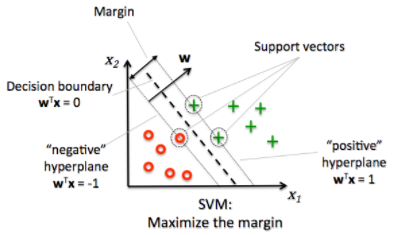



A presentations of SVM:
- http://www.robots.ox.ac.uk/~az/lectures/ml/lect2.pdf

# Hard margin linear SVM  (0 or  1)

## No violation and and no regularization 


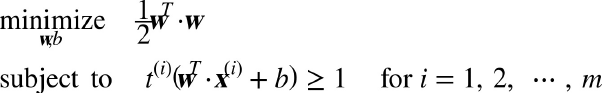



# Soft margin linear SVM  

## Introduce slacks regularizations and margin violations


### Reducing overfit



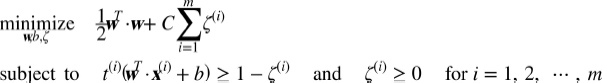







**The idea is to minimize the two terms of the objective function. C is the regrularization parameter

**Larger C** => **smaller margin** but too large C may lead to underfitting.

**Smaller C** => **larger margin** but too small C may lead to overfitting.

After adding regularization term, if I still have overfitting? what can we do with C?

In [4]:
import sklearn.svm
help (sklearn.svm)

Help on package sklearn.svm in sklearn:

NAME
    sklearn.svm - The :mod:`sklearn.svm` module includes Support Vector Machine algorithms.

PACKAGE CONTENTS
    base
    bounds
    classes
    liblinear
    libsvm
    libsvm_sparse
    setup
    tests (package)

CLASSES
    sklearn.base.BaseEstimator(builtins.object)
        sklearn.svm.classes.LinearSVC(sklearn.base.BaseEstimator, sklearn.linear_model.base.LinearClassifierMixin, sklearn.linear_model.base.SparseCoefMixin)
    sklearn.base.RegressorMixin(builtins.object)
        sklearn.svm.classes.LinearSVR(sklearn.linear_model.base.LinearModel, sklearn.base.RegressorMixin)
        sklearn.svm.classes.NuSVR(sklearn.svm.base.BaseLibSVM, sklearn.base.RegressorMixin)
        sklearn.svm.classes.SVR(sklearn.svm.base.BaseLibSVM, sklearn.base.RegressorMixin)
    sklearn.linear_model.base.LinearClassifierMixin(sklearn.base.ClassifierMixin)
        sklearn.svm.classes.LinearSVC(sklearn.base.BaseEstimator, sklearn.linear_model.base.LinearClassif

In [5]:
## Try the above example with SVM

import numpy as np
import warnings
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split as tts 
from sklearn import svm
from sklearn.metrics import accuracy_score,confusion_matrix

 

patOutcome=label_encoder.fit_transform(patFlags['icustay_expire_flg'])
Results=[]
confusionMatrix=[]



clf=svm.SVC(kernel='rbf',probability=True, C=0.4)
myData=MinMaxPd 
X_train, X_val, y_train, y_val = tts(myData,patOutcome, test_size=0.2, random_state=42)
clf.fit(X_train,y_train)
pred =clf.predict(X_val)
tn, fp, fn, tp=confusion_matrix(y_val,pred).ravel()
confusionMatrix.append([tn, fp, fn, tp])
Results.append(accuracy_score(y_val, pred))


clf=svm.SVC(kernel='rbf',probability=True, C=0.4)
myData=MinMaxPd.drop(['congestive_heart_failure', 'valvular_disease', 'pulmonary_circulation',
       'diabetes_complicated', 'lymphoma', 'weight_loss', 'fluid_electrolyte',
       'blood_loss_anemia', 'deficiency_anemias', 'alcohol_abuse',
       'drug_abuse', 'psychoses', 'depression'], axis=1)
X_train, X_val, y_train, y_val = tts(myData,patOutcome, test_size=0.1, random_state=42)
clf.fit(X_train,y_train)
pred =clf.predict(X_val)
tn, fp, fn, tp=confusion_matrix(y_val,pred).ravel()
confusionMatrix.append([tn, fp, fn, tp])
Results.append(accuracy_score(y_val, pred))
               

clf=svm.SVC(kernel='rbf',probability=True, C=0.4)
myData=MinMaxPd.drop([ 'HR_2', 'RR_2', 'SBP_2',
       'HR_3', 'RR_3', 'SBP_3', 'HR_4', 'RR_4', 'SBP_4', 'HR_5', 'RR_5',
       'SBP_5', 'HR_6', 'RR_6', 'SBP_6', 'HR_7', 'RR_7', 'SBP_7', 'HR_8',
       'RR_8', 'SBP_8', 'HR_9', 'RR_9', 'SBP_9', 'HR_10', 'RR_10', 'SBP_10',
       'HR_11', 'RR_11', 'SBP_11', 'HR_12', 'RR_12', 'SBP_12', 'HR_13',
       'RR_13', 'SBP_13', 'HR_14', 'RR_14', 'SBP_14', 'HR_15', 'RR_15',
       'SBP_15', 'HR_16', 'RR_16', 'SBP_16', 'HR_17', 'RR_17', 'SBP_17',
       'HR_18', 'RR_18', 'SBP_18', 'HR_19', 'RR_19', 'SBP_19', 'HR_20',
       'RR_20', 'SBP_20', 'HR_21', 'RR_21', 'SBP_21', 'HR_22', 'RR_22',
       'SBP_22', 'HR_23', 'RR_23', 'SBP_23', 'HR_24', 'SBP_24', 'HR_25'], axis=1)
X_train, X_val, y_train, y_val = tts(myData,patOutcome, test_size=0.1, random_state=42)
clf.fit(X_train,y_train)
pred =clf.predict(X_val)
tn, fp, fn, tp=confusion_matrix(y_val,pred).ravel()
confusionMatrix.append([tn, fp, fn, tp])
Results.append(accuracy_score(y_val, pred))

#['sex', 'ICUAGE', 'religion_descr', 'weight_first']

clf=svm.SVC(kernel='rbf',probability=True, C=0.4)
myData=MinMaxPd[['sex', 'ICUAGE', 'religion_descr', 'weight_first']]
X_train, X_val, y_train, y_val = tts(myData,patOutcome, test_size=0.1, random_state=42)
clf.fit(X_train,y_train)
pred =clf.predict(X_val)
tn, fp, fn, tp=confusion_matrix(y_val,pred).ravel()
confusionMatrix.append([tn, fp, fn, tp])
Results.append(accuracy_score(y_val, pred))

               
print(Results)
print(confusionMatrix)
pd.Series(y_val).value_counts()

[0.8266666666666667, 0.824468085106383, 0.824468085106383, 0.824468085106383]
[[310, 0, 65, 0], [155, 0, 33, 0], [155, 0, 33, 0], [155, 0, 33, 0]]


0    155
1     33
dtype: int64

## K-Nearest Neighbor (K-NN)  -- Lazy learning


### Steps:

    1. Choose the number of k and the distance metric.
    2. Find the k nearest numbers of the sample that we want to classify.
    3. Assign the class label by majority votes. 

 <img src="KNN.png" height= 40% width=40% style="right;">

A presentations for KNN:

- http://www.csd.uwo.ca/courses/CS9840a/Lecture2_knn.pdf



In [6]:
import sklearn.neighbors
help (sklearn.neighbors)

Help on package sklearn.neighbors in sklearn:

NAME
    sklearn.neighbors

DESCRIPTION
    The :mod:`sklearn.neighbors` module implements the k-nearest neighbors
    algorithm.

PACKAGE CONTENTS
    approximate
    ball_tree
    base
    classification
    dist_metrics
    graph
    kd_tree
    kde
    lof
    nearest_centroid
    quad_tree
    regression
    setup
    tests (package)
    typedefs
    unsupervised

CLASSES
    builtins.object
        sklearn.neighbors.dist_metrics.DistanceMetric
    sklearn.base.BaseEstimator(builtins.object)
        sklearn.neighbors.approximate.LSHForest(sklearn.base.BaseEstimator, sklearn.neighbors.base.KNeighborsMixin, sklearn.neighbors.base.RadiusNeighborsMixin)
        sklearn.neighbors.kde.KernelDensity
        sklearn.neighbors.nearest_centroid.NearestCentroid(sklearn.base.BaseEstimator, sklearn.base.ClassifierMixin)
    sklearn.base.ClassifierMixin(builtins.object)
        sklearn.neighbors.classification.KNeighborsClassifier(sklearn.neighbors

In [7]:
## Try the above example with K-nearest Neigber

import numpy as np
import warnings
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split as tts 
from sklearn import neighbors
from sklearn.metrics import accuracy_score,confusion_matrix

 

patOutcome=label_encoder.fit_transform(patFlags['icustay_expire_flg'])
Results=[]
confusionMatrix=[]



clf=neighbors.KNeighborsClassifier(n_neighbors=9)
myData=MinMaxPd 
X_train, X_val, y_train, y_val = tts(myData,patOutcome, test_size=0.2, random_state=42)
clf.fit(X_train,y_train)
pred =clf.predict(X_val)
tn, fp, fn, tp=confusion_matrix(y_val,pred).ravel()
confusionMatrix.append([tn, fp, fn, tp])
Results.append(accuracy_score(y_val, pred))


clf=neighbors.KNeighborsClassifier(n_neighbors=9)
myData=MinMaxPd.drop(['congestive_heart_failure', 'valvular_disease', 'pulmonary_circulation',
       'diabetes_complicated', 'lymphoma', 'weight_loss', 'fluid_electrolyte',
       'blood_loss_anemia', 'deficiency_anemias', 'alcohol_abuse',
       'drug_abuse', 'psychoses', 'depression'], axis=1)
X_train, X_val, y_train, y_val = tts(myData,patOutcome, test_size=0.1, random_state=42)
clf.fit(X_train,y_train)
pred =clf.predict(X_val)
tn, fp, fn, tp=confusion_matrix(y_val,pred).ravel()
confusionMatrix.append([tn, fp, fn, tp])
Results.append(accuracy_score(y_val, pred))
               

clf=neighbors.KNeighborsClassifier(n_neighbors=9)
myData=MinMaxPd.drop([ 'HR_2', 'RR_2', 'SBP_2',
       'HR_3', 'RR_3', 'SBP_3', 'HR_4', 'RR_4', 'SBP_4', 'HR_5', 'RR_5',
       'SBP_5', 'HR_6', 'RR_6', 'SBP_6', 'HR_7', 'RR_7', 'SBP_7', 'HR_8',
       'RR_8', 'SBP_8', 'HR_9', 'RR_9', 'SBP_9', 'HR_10', 'RR_10', 'SBP_10',
       'HR_11', 'RR_11', 'SBP_11', 'HR_12', 'RR_12', 'SBP_12', 'HR_13',
       'RR_13', 'SBP_13', 'HR_14', 'RR_14', 'SBP_14', 'HR_15', 'RR_15',
       'SBP_15', 'HR_16', 'RR_16', 'SBP_16', 'HR_17', 'RR_17', 'SBP_17',
       'HR_18', 'RR_18', 'SBP_18', 'HR_19', 'RR_19', 'SBP_19', 'HR_20',
       'RR_20', 'SBP_20', 'HR_21', 'RR_21', 'SBP_21', 'HR_22', 'RR_22',
       'SBP_22', 'HR_23', 'RR_23', 'SBP_23', 'HR_24', 'SBP_24', 'HR_25'], axis=1)
X_train, X_val, y_train, y_val = tts(myData,patOutcome, test_size=0.1, random_state=42)
clf.fit(X_train,y_train)
pred =clf.predict(X_val)
tn, fp, fn, tp=confusion_matrix(y_val,pred).ravel()
confusionMatrix.append([tn, fp, fn, tp])
Results.append(accuracy_score(y_val, pred))

#['sex', 'ICUAGE', 'religion_descr', 'weight_first']

clf=neighbors.KNeighborsClassifier(n_neighbors=9)
myData=MinMaxPd[['sex', 'ICUAGE', 'religion_descr', 'weight_first']]
X_train, X_val, y_train, y_val = tts(myData,patOutcome, test_size=0.1, random_state=42)
clf.fit(X_train,y_train)
pred =clf.predict(X_val)
tn, fp, fn, tp=confusion_matrix(y_val,pred).ravel()
confusionMatrix.append([tn, fp, fn, tp])
Results.append(accuracy_score(y_val, pred))

               
print(Results)
print(confusionMatrix)
pd.Series(y_val).value_counts()

[0.8026666666666666, 0.8351063829787234, 0.8191489361702128, 0.8404255319148937]
[[296, 14, 60, 5], [155, 0, 31, 2], [153, 2, 32, 1], [154, 1, 29, 4]]


0    155
1     33
dtype: int64

## Decision Tree (DT)

Let us go through this example: http://mines.humanoriented.com/classes/2010/fall/csci568/portfolio_exports/lguo/decisionTree.html

We need Information theory metrics such as Entropy to prune the tree or to determine the split point:

A Presentation for DT metrics: http://www.ke.tu-darmstadt.de/lehre/archiv/ws0809/mldm/dt.pdf



In [8]:
import sklearn.tree
help (sklearn.tree.DecisionTreeClassifier)

Help on class DecisionTreeClassifier in module sklearn.tree.tree:

class DecisionTreeClassifier(BaseDecisionTree, sklearn.base.ClassifierMixin)
 |  A decision tree classifier.
 |  
 |  Read more in the :ref:`User Guide <tree>`.
 |  
 |  Parameters
 |  ----------
 |  criterion : string, optional (default="gini")
 |      The function to measure the quality of a split. Supported criteria are
 |      "gini" for the Gini impurity and "entropy" for the information gain.
 |  
 |  splitter : string, optional (default="best")
 |      The strategy used to choose the split at each node. Supported
 |      strategies are "best" to choose the best split and "random" to choose
 |      the best random split.
 |  
 |  max_depth : int or None, optional (default=None)
 |      The maximum depth of the tree. If None, then nodes are expanded until
 |      all leaves are pure or until all leaves contain less than
 |      min_samples_split samples.
 |  
 |  min_samples_split : int, float, optional (default=2)

In [9]:
#Visualize the decision tree example


import numpy as np
import warnings
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split as tts 
import sklearn.tree
from sklearn.metrics import accuracy_score,confusion_matrix

 

patOutcome=label_encoder.fit_transform(patFlags['icustay_expire_flg'])
Results=[]
confusionMatrix=[]



clf=sklearn.tree.DecisionTreeClassifier(max_depth=5)
myData=MinMaxPd 
X_train, X_val, y_train, y_val = tts(myData,patOutcome, test_size=0.2, random_state=42)
clf.fit(X_train,y_train)
with open('DTclassifier_MIMICALL.txt', "w") as f:
    f = sklearn.tree.export_graphviz(clf, 
                        class_names=['No','Yes'],
                        feature_names= myData.columns,
                        rounded=True,
                        filled=True,
                        out_file=f)



pred =clf.predict(X_val)
tn, fp, fn, tp=confusion_matrix(y_val,pred).ravel()
confusionMatrix.append([tn, fp, fn, tp])
Results.append(accuracy_score(y_val, pred))


print(Results[0])
print(confusionMatrix[0])

0.792
[288, 22, 56, 9]


To draw the below figure: 
1. Retrieve the output text file: [a relative link](DTclassifier_MIMICALL.txt)
2. Cut and paste the content and Go to the http://www.webgraphviz.com/ to visualize

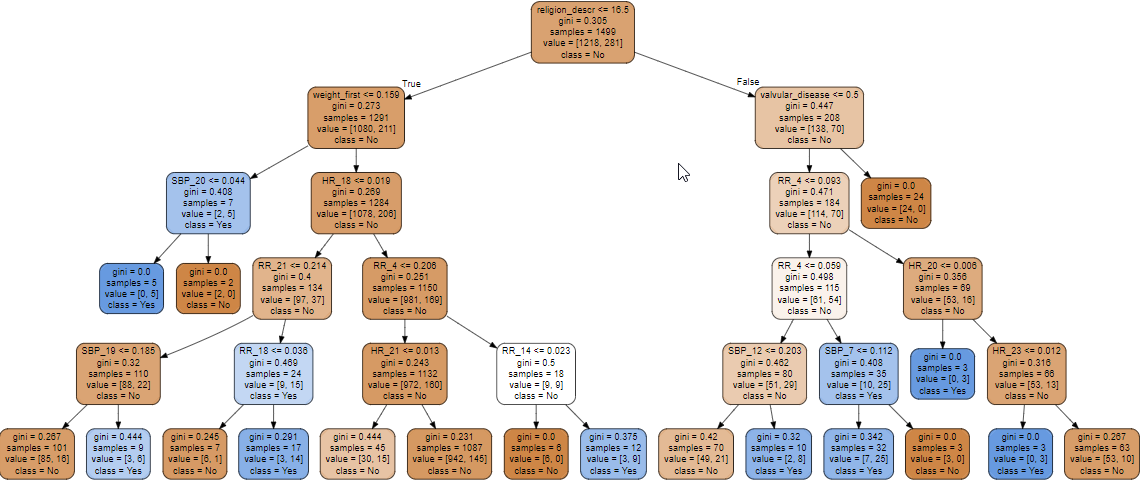

In [10]:
#Visualize the decision tree example


import numpy as np
import warnings
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split as tts 
import sklearn.tree
from sklearn.metrics import accuracy_score,confusion_matrix

 

patOutcome=label_encoder.fit_transform(patFlags['icustay_expire_flg'])
Results=[]
confusionMatrix=[]



clf=sklearn.tree.DecisionTreeClassifier(max_depth=7)
myData=MinMaxPd 
X_train, X_val, y_train, y_val = tts(myData,patOutcome, test_size=0.2, random_state=42)
clf.fit(X_train,y_train)
pred =clf.predict(X_val)
tn, fp, fn, tp=confusion_matrix(y_val,pred).ravel()
confusionMatrix.append([tn, fp, fn, tp])
Results.append(accuracy_score(y_val, pred))


clf=sklearn.tree.DecisionTreeClassifier(max_depth=7)
myData=MinMaxPd.drop(['congestive_heart_failure', 'valvular_disease', 'pulmonary_circulation',
       'diabetes_complicated', 'lymphoma', 'weight_loss', 'fluid_electrolyte',
       'blood_loss_anemia', 'deficiency_anemias', 'alcohol_abuse',
       'drug_abuse', 'psychoses', 'depression'], axis=1)
X_train, X_val, y_train, y_val = tts(myData,patOutcome, test_size=0.1, random_state=42)
clf.fit(X_train,y_train)
pred =clf.predict(X_val)
tn, fp, fn, tp=confusion_matrix(y_val,pred).ravel()
confusionMatrix.append([tn, fp, fn, tp])
Results.append(accuracy_score(y_val, pred))
               

clf=sklearn.tree.DecisionTreeClassifier(max_depth=7)
myData=MinMaxPd.drop([ 'HR_2', 'RR_2', 'SBP_2',
       'HR_3', 'RR_3', 'SBP_3', 'HR_4', 'RR_4', 'SBP_4', 'HR_5', 'RR_5',
       'SBP_5', 'HR_6', 'RR_6', 'SBP_6', 'HR_7', 'RR_7', 'SBP_7', 'HR_8',
       'RR_8', 'SBP_8', 'HR_9', 'RR_9', 'SBP_9', 'HR_10', 'RR_10', 'SBP_10',
       'HR_11', 'RR_11', 'SBP_11', 'HR_12', 'RR_12', 'SBP_12', 'HR_13',
       'RR_13', 'SBP_13', 'HR_14', 'RR_14', 'SBP_14', 'HR_15', 'RR_15',
       'SBP_15', 'HR_16', 'RR_16', 'SBP_16', 'HR_17', 'RR_17', 'SBP_17',
       'HR_18', 'RR_18', 'SBP_18', 'HR_19', 'RR_19', 'SBP_19', 'HR_20',
       'RR_20', 'SBP_20', 'HR_21', 'RR_21', 'SBP_21', 'HR_22', 'RR_22',
       'SBP_22', 'HR_23', 'RR_23', 'SBP_23', 'HR_24', 'SBP_24', 'HR_25'], axis=1)
X_train, X_val, y_train, y_val = tts(myData,patOutcome, test_size=0.1, random_state=42)
clf.fit(X_train,y_train)
pred =clf.predict(X_val)
tn, fp, fn, tp=confusion_matrix(y_val,pred).ravel()
confusionMatrix.append([tn, fp, fn, tp])
Results.append(accuracy_score(y_val, pred))

#['sex', 'ICUAGE', 'religion_descr', 'weight_first']

cclf=sklearn.tree.DecisionTreeClassifier(max_depth=7)
myData=MinMaxPd[['sex', 'ICUAGE', 'religion_descr', 'weight_first']]
X_train, X_val, y_train, y_val = tts(myData,patOutcome, test_size=0.1, random_state=42)
clf.fit(X_train,y_train)
pred =clf.predict(X_val)
tn, fp, fn, tp=confusion_matrix(y_val,pred).ravel()
confusionMatrix.append([tn, fp, fn, tp])
Results.append(accuracy_score(y_val, pred))

               
print(Results)
print(confusionMatrix)
pd.Series(y_val).value_counts()


[0.7893333333333333, 0.8085106382978723, 0.8191489361702128, 0.8404255319148937]
[[287, 23, 56, 9], [148, 7, 29, 4], [150, 5, 29, 4], [151, 4, 26, 7]]


0    155
1     33
dtype: int64

## [Ensemble Methods](https://en.wikipedia.org/wiki/Ensemble_learning)


Ensemble method is to create several weak classifiers that each one has its own local task to learn from subset/whole features or dataset. Each classifier may increase its performance from learning the others' mistakes or from repeating its learning tasks from its misclassification examples over the training dataset(s). Then it aggregates the classifiers' results to have better predictions.

It improves in general the performance but it degrades the interpretability. Sometimes, when many weak classifiers result in poor results, the ensemble method gets worse results than some weakers.

# Ensemble Methods: Voting classifier

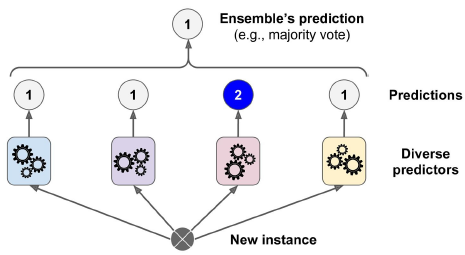

In [11]:
import sklearn.ensemble
help(sklearn.ensemble.voting_classifier)

Help on module sklearn.ensemble.voting_classifier in sklearn.ensemble:

NAME
    sklearn.ensemble.voting_classifier - Soft Voting/Majority Rule classifier.

DESCRIPTION
    This module contains a Soft Voting/Majority Rule classifier for
    classification estimators.

CLASSES
    sklearn.base.ClassifierMixin(builtins.object)
        VotingClassifier(sklearn.utils.metaestimators._BaseComposition, sklearn.base.ClassifierMixin, sklearn.base.TransformerMixin)
    sklearn.base.TransformerMixin(builtins.object)
        VotingClassifier(sklearn.utils.metaestimators._BaseComposition, sklearn.base.ClassifierMixin, sklearn.base.TransformerMixin)
    sklearn.utils.metaestimators._BaseComposition(abc.NewBase)
        VotingClassifier(sklearn.utils.metaestimators._BaseComposition, sklearn.base.ClassifierMixin, sklearn.base.TransformerMixin)
    
    class VotingClassifier(sklearn.utils.metaestimators._BaseComposition, sklearn.base.ClassifierMixin, sklearn.base.TransformerMixin)
     |  Soft Voting/

# Ensemble Methods: Boosting classifier

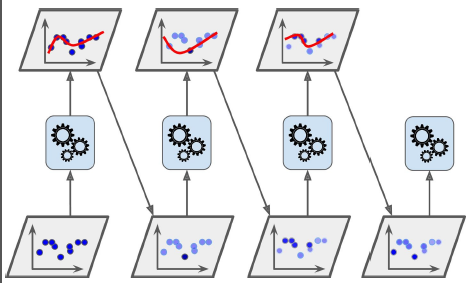

In [13]:
import sklearn.ensemble
help(sklearn.ensemble.AdaBoostClassifier)

Help on class AdaBoostClassifier in module sklearn.ensemble.weight_boosting:

class AdaBoostClassifier(BaseWeightBoosting, sklearn.base.ClassifierMixin)
 |  An AdaBoost classifier.
 |  
 |  An AdaBoost [1] classifier is a meta-estimator that begins by fitting a
 |  classifier on the original dataset and then fits additional copies of the
 |  classifier on the same dataset but where the weights of incorrectly
 |  classified instances are adjusted such that subsequent classifiers focus
 |  more on difficult cases.
 |  
 |  This class implements the algorithm known as AdaBoost-SAMME [2].
 |  
 |  Read more in the :ref:`User Guide <adaboost>`.
 |  
 |  Parameters
 |  ----------
 |  base_estimator : object, optional (default=DecisionTreeClassifier)
 |      The base estimator from which the boosted ensemble is built.
 |      Support for sample weighting is required, as well as proper `classes_`
 |      and `n_classes_` attributes.
 |  
 |  n_estimators : integer, optional (default=50)
 |    

In [14]:
import sklearn.ensemble
help(sklearn.ensemble.GradientBoostingClassifier)

Help on class GradientBoostingClassifier in module sklearn.ensemble.gradient_boosting:

class GradientBoostingClassifier(BaseGradientBoosting, sklearn.base.ClassifierMixin)
 |  Gradient Boosting for classification.
 |  
 |  GB builds an additive model in a
 |  forward stage-wise fashion; it allows for the optimization of
 |  arbitrary differentiable loss functions. In each stage ``n_classes_``
 |  regression trees are fit on the negative gradient of the
 |  binomial or multinomial deviance loss function. Binary classification
 |  is a special case where only a single regression tree is induced.
 |  
 |  Read more in the :ref:`User Guide <gradient_boosting>`.
 |  
 |  Parameters
 |  ----------
 |  loss : {'deviance', 'exponential'}, optional (default='deviance')
 |      loss function to be optimized. 'deviance' refers to
 |      deviance (= logistic regression) for classification
 |      with probabilistic outputs. For loss 'exponential' gradient
 |      boosting recovers the AdaBoost a

## [Random Forest Tree](https://en.wikipedia.org/wiki/Random_forest)

The idea is that we have usually many noise/sparse features and/or small datasets relative to the number of features. If we model the whole data at once, this degrades the accuracy esp. if we model the data with decision tree (DT). Random Forest Tree uses the concept of bootstrapping to build weak models such that each one is related to a subset of examples and features. It then aggregates the results into a better prediction.

[The reference paper and the number of features selected at each node](https://www.stat.berkeley.edu/~breiman/randomforest2001.pdf)

## Steps

1. Draw a random bootstrap sample of the size $n$ with replacement.
2. Build a DT for each sample such that at each node:
    - 2.1) Select randomly $ f $ features without replacement.
    - 2.2) Use DT information theory metrics to split the nodes in 2.1
3. Repeat 1 and 2 number of times (which presents the # of bootstrapping samples).
4. Aggregate the results of (3) by voting described below.


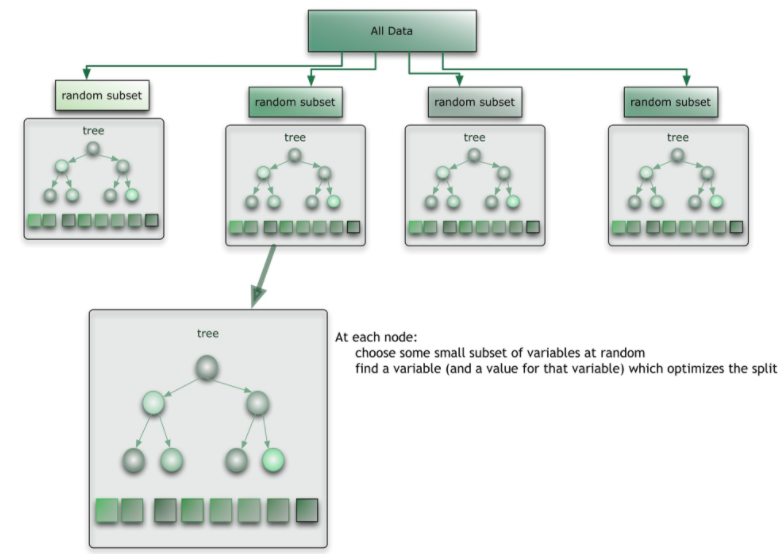

<sub>
       Figure reference:  http://blog.citizennet.com/blog/2012/11/10/random-forests-ensembles-and-performance-metrics
</sub>


### [Random Forests in Scikit-Learn](http://scikit-learn.org/stable/modules/ensemble.html#forests-of-randomized-trees)

In [50]:
import sklearn.ensemble 
help(sklearn.ensemble.RandomForestClassifier)

Help on class RandomForestClassifier in module sklearn.ensemble.forest:

class RandomForestClassifier(ForestClassifier)
 |  A random forest classifier.
 |  
 |  A random forest is a meta estimator that fits a number of decision tree
 |  classifiers on various sub-samples of the dataset and use averaging to
 |  improve the predictive accuracy and control over-fitting.
 |  The sub-sample size is always the same as the original
 |  input sample size but the samples are drawn with replacement if
 |  `bootstrap=True` (default).
 |  
 |  Read more in the :ref:`User Guide <forest>`.
 |  
 |  Parameters
 |  ----------
 |  n_estimators : integer, optional (default=10)
 |      The number of trees in the forest.
 |  
 |  criterion : string, optional (default="gini")
 |      The function to measure the quality of a split. Supported criteria are
 |      "gini" for the Gini impurity and "entropy" for the information gain.
 |      Note: this parameter is tree-specific.
 |  
 |  max_features : int, fl

## Ensemble Methods: 
####  [Bagging (Bootstrap aggregating)](https://en.wikipedia.org/wiki/Bootstrap_aggregating) classifier

![image.png](https://goo.gl/7TNLbu)


### [Bagging in Scikit-Learn](http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.BaggingClassifier.html)

if no replacement, then pasting

In [56]:
import sklearn.ensemble 
help(sklearn.ensemble.BaggingClassifier)

Help on class BaggingClassifier in module sklearn.ensemble.bagging:

class BaggingClassifier(BaseBagging, sklearn.base.ClassifierMixin)
 |  A Bagging classifier.
 |  
 |  A Bagging classifier is an ensemble meta-estimator that fits base
 |  classifiers each on random subsets of the original dataset and then
 |  aggregate their individual predictions (either by voting or by averaging)
 |  to form a final prediction. Such a meta-estimator can typically be used as
 |  a way to reduce the variance of a black-box estimator (e.g., a decision
 |  tree), by introducing randomization into its construction procedure and
 |  then making an ensemble out of it.
 |  
 |  This algorithm encompasses several works from the literature. When random
 |  subsets of the dataset are drawn as random subsets of the samples, then
 |  this algorithm is known as Pasting [1]_. If samples are drawn with
 |  replacement, then the method is known as Bagging [2]_. When random subsets
 |  of the dataset are drawn as ra

In [15]:
#Compare DT and RFT [Using Bagging concept]


import numpy as np
import warnings
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split as tts 
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score,confusion_matrix

 

patOutcome=label_encoder.fit_transform(patFlags['icustay_expire_flg'])
Results=[]
confusionMatrix=[]
X_train, X_val, y_train, y_val = tts(myData,patOutcome, test_size=0.2, random_state=42)



clf=sklearn.tree.DecisionTreeClassifier(max_depth=5)
myData=MinMaxPd 

clf.fit(X_train,y_train)
pred =clf.predict(X_val)
tn, fp, fn, tp=confusion_matrix(y_val,pred).ravel()
confusionMatrix.append([tn, fp, fn, tp])
Results.append(accuracy_score(y_val, pred))


bag_clf = BaggingClassifier(
            DecisionTreeClassifier(random_state=42), n_estimators=800,
            max_samples=500, bootstrap=True, n_jobs=-1, random_state=42)
myData=MinMaxPd 
bag_clf.fit(X_train,y_train)
pred =bag_clf.predict(X_val)
tn, fp, fn, tp=confusion_matrix(y_val,pred).ravel()
confusionMatrix.append([tn, fp, fn, tp])
Results.append(accuracy_score(y_val, pred))

print(Results)
print(confusionMatrix)


[0.8346666666666667, 0.8346666666666667]
[[310, 0, 62, 3], [306, 4, 58, 7]]


In [16]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import neighbors
from sklearn.ensemble import VotingClassifier,RandomForestClassifier,AdaBoostClassifier,GradientBoostingClassifier
from sklearn.metrics import accuracy_score,auc,roc_curve
from sklearn.model_selection import train_test_split as tts
import matplotlib.pyplot as plt



ds_clf=sklearn.tree.DecisionTreeClassifier(max_depth=5)
nb_clf=neighbors.KNeighborsClassifier(n_neighbors=9)

rnd_clf = RandomForestClassifier(random_state=42,n_estimators=800, max_features=10, max_depth=5)


voting_clf = VotingClassifier(
        estimators=[('ds', ds_clf), ('rnd', rnd_clf), ('nb',nb_clf)],
        voting='soft')

ada_clf=AdaBoostClassifier(n_estimators=500,random_state=42)
gb_clf=GradientBoostingClassifier(random_state=42,n_estimators=800, max_features=10, max_depth=5,loss='exponential')
 
colors = ['black', 'orange', 'blue', 'green']
linestyles = [':', '--', '-.', '-']    
cCounter = 0


myData=MinMaxPd
X_train, X_val, y_train, y_val = tts(myData,patOutcome, test_size=0.2, random_state=42)



for clf in (rnd_clf, voting_clf,ada_clf,gb_clf):
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_val)
    fpr, tpr, thresholds = roc_curve(y_true=y_val, y_score=y_pred)
    roc_auc = auc(x=fpr, y=tpr)
    plt.plot(fpr, tpr,color=colors[cCounter],linestyle=linestyles[cCounter], label='%s (auc = %0.2f)' % (clf.__class__.__name__, roc_auc))
    cCounter=cCounter+1 
    print(clf.__class__.__name__, accuracy_score(y_val, y_pred))

plt.legend(loc='lower right')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray', linewidth=2)
plt.xlim([-0.1, 1.1])
plt.ylim([-0.1, 1.1])
plt.grid()
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

RandomForestClassifier 0.8346666666666667
VotingClassifier 0.8186666666666667
AdaBoostClassifier 0.7386666666666667
GradientBoostingClassifier 0.8213333333333334


<Figure size 640x480 with 1 Axes>

In [17]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import neighbors
from sklearn.ensemble import VotingClassifier,RandomForestClassifier,AdaBoostClassifier,GradientBoostingClassifier
from sklearn.metrics import accuracy_score,auc,roc_curve
from sklearn.model_selection import train_test_split as tts, StratifiedShuffleSplit as sss, cross_val_score as cvs, KFold as kf
import matplotlib.pyplot as plt



ds_clf=sklearn.tree.DecisionTreeClassifier(max_depth=5)
nb_clf=neighbors.KNeighborsClassifier(n_neighbors=9)

rnd_clf = RandomForestClassifier(random_state=42,n_estimators=800, max_features=10, max_depth=5)


voting_clf = VotingClassifier(
        estimators=[('ds', ds_clf), ('rnd', rnd_clf), ('nb',nb_clf)],
        voting='soft')

ada_clf=AdaBoostClassifier(n_estimators=500,random_state=42)
gb_clf=GradientBoostingClassifier(random_state=42,n_estimators=800, max_features=10, max_depth=5,loss='exponential')
 
colors = ['black', 'orange', 'blue', 'green']
linestyles = [':', '--', '-.', '-']    
cCounter = 0


myData=MinMaxPd
#X_train, X_val, y_train, y_val = tts(myData,patOutcome, test_size=0.2, random_state=42)
#splits = sss(n_splits=10, test_size=((len(myData)*.20)/len(myData)), random_state=42)
splits =kf(n_splits=10, shuffle=True, random_state=42)

infinity = -1.0 * float("inf")
index=-1 
count =-1


for clf in (rnd_clf, voting_clf,ada_clf,gb_clf):
    count = count +1
    clf.fit(myData,patOutcome)
    cvsScores=cvs(clf, myData,patOutcome,cv=splits,scoring='roc_auc')
    meanAUC=cvsScores.mean()
    print(clf.__class__.__name__, meanAUC,cvsScores)
    if (meanAUC > infinity):
        infinity = meanAUC
        index = count
        L1,L2,L3 = clf.__class__.__name__,cvsScores, infinity
print(L1,L2,L3) 

RandomForestClassifier 0.6247100096889863 [0.6742913  0.63621795 0.58720238 0.63716216 0.57603604 0.69193206
 0.63225225 0.6187291  0.64072072 0.55255614]
VotingClassifier 0.6061770415135891 [0.6572825  0.62039263 0.59866071 0.62466216 0.45333333 0.70806794
 0.6563964  0.59842332 0.55711712 0.5874343 ]
AdaBoostClassifier 0.5595202014771313 [0.50889541 0.63701923 0.55193452 0.59273649 0.5354955  0.55265393
 0.54495495 0.63330148 0.49783784 0.54037267]
GradientBoostingClassifier 0.5943597232085474 [0.64809384 0.58874199 0.58303571 0.62989865 0.57657658 0.62866242
 0.69351351 0.58504539 0.56306306 0.44696608]
RandomForestClassifier [0.6742913  0.63621795 0.58720238 0.63716216 0.57603604 0.69193206
 0.63225225 0.6187291  0.64072072 0.55255614] 0.6247100096889863


Run the above experiment to MinMaxPad and use different kfold

# Take-home message (Discussion)